# Wine Data Set

***

## Setup

***

In [37]:
# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Logistic regression.
import sklearn.linear_model as lm

# K nearest neaighbours.
import sklearn.neighbors as nei

# Helper functions.
import sklearn.model_selection as mod

# Fancier, statistical plots.
import seaborn as sns

In [38]:
# Standard plot size.
plt.rcParams['figure.figsize'] = (15, 10)

# Standard colour scheme.
plt.style.use('ggplot')





## The Wine Dataset

***


In [43]:
dataset = pd.read_csv("winequalityN.csv")

In [44]:
dataset

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
4         0.058                 47.0                 186.0  0.99560  3.19   
...         ...                  ...                   ...      ...   ...   
6492      0.090                 32.0                  44.0  0.99490  3.45   
6493      0.062                 39.0                  51.0  0.99512  3.52   
6494      0.076                 29.0                  40.0  0.99574  3.42   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
0          0.45      8.8        6  
1          0.49      9.5        6  
2          0.44     10.1        6  
3          0.40      9.9        6  
4          0.40      9.9        6  
...         ...      ...      ...  
6492       0.58     10.5        5  
6493        NaN     11.2        6  
6494       0.75     11.0        6  
6495       0.71     10.2        5  
6496       0.66     11.0        6  

[6497 rows x 13 columns]

In [45]:
dataset.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6487.000000       6489.000000  6494.000000     6495.000000   
mean        7.216579          0.339691     0.318722        5.444326   
std         1.296750          0.164649     0.145265        4.758125   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6495.000000          6497.000000           6497.000000  6497.000000   
mean      0.056042            30.525319            115.744574     0.994697   
std       0.035036            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6488.000000  6493.000000  6497.000000  6497.000000  
mean      3.218395     0.531215    10.491801     5.818378  
std       0.160748     0.148814     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

## Visualise

***



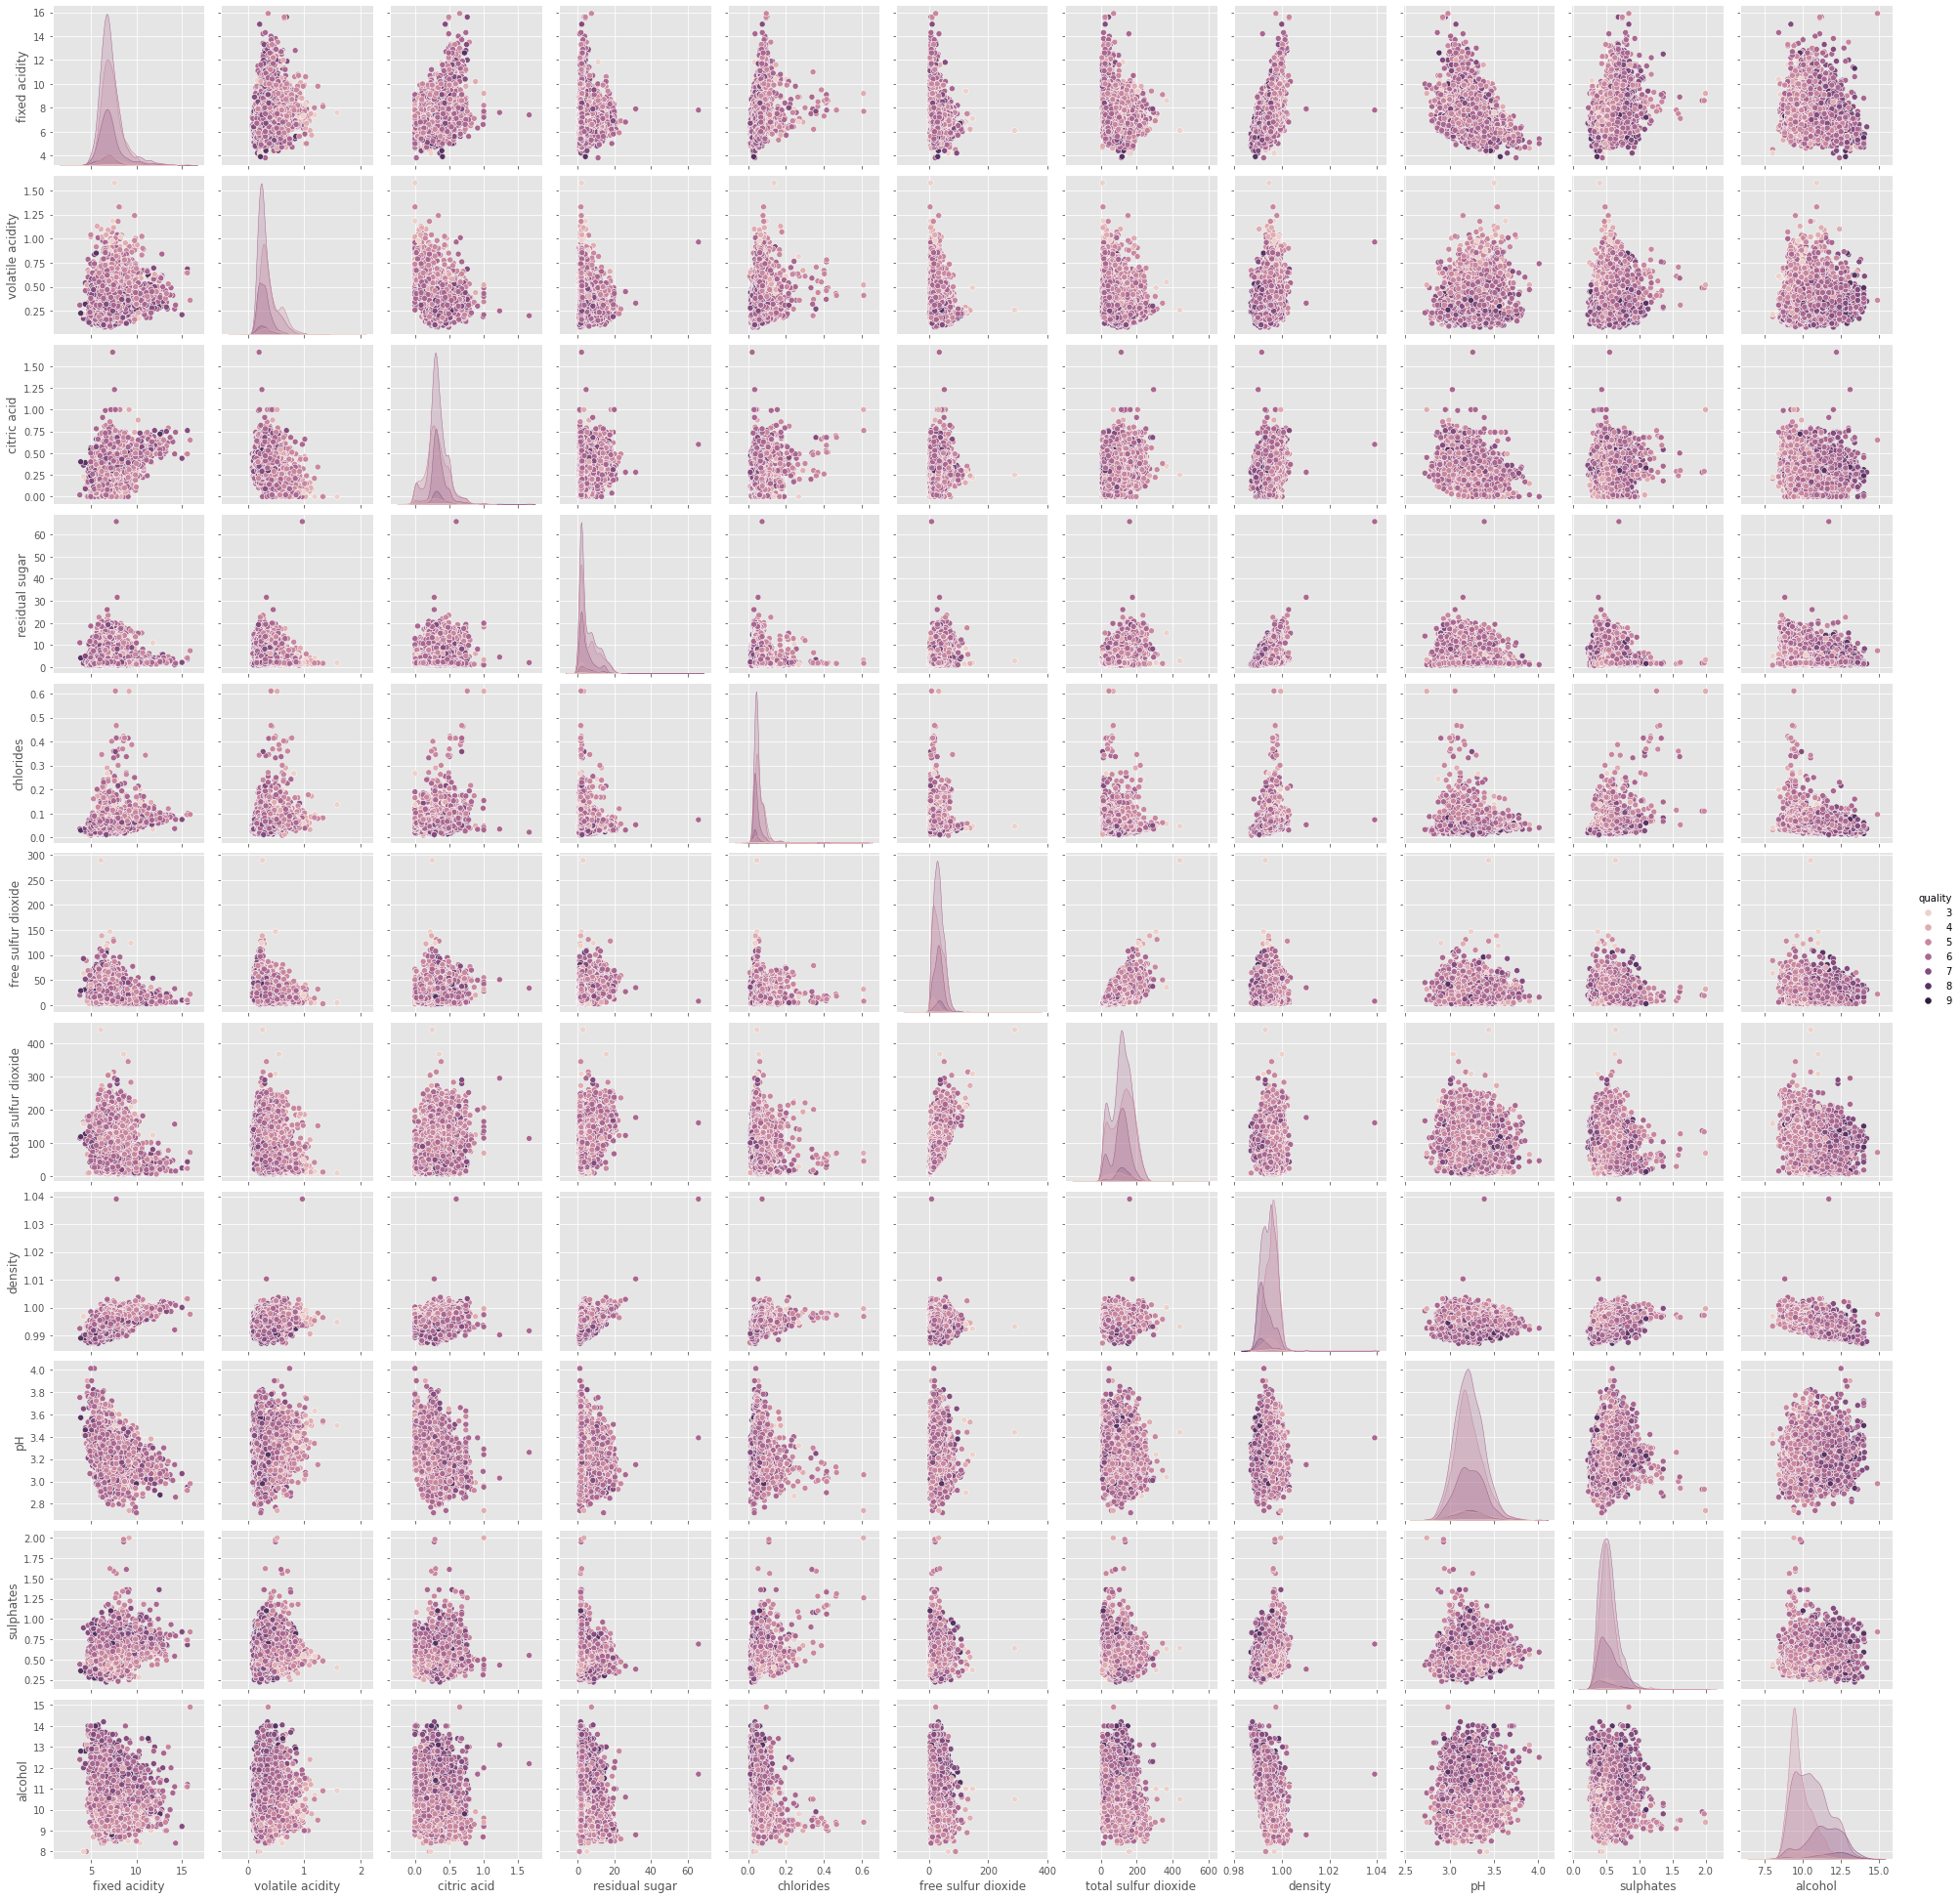

In [46]:
# Scatter plots and kdes.
# Described by quality
sns.pairplot(dataset, hue = 'quality');

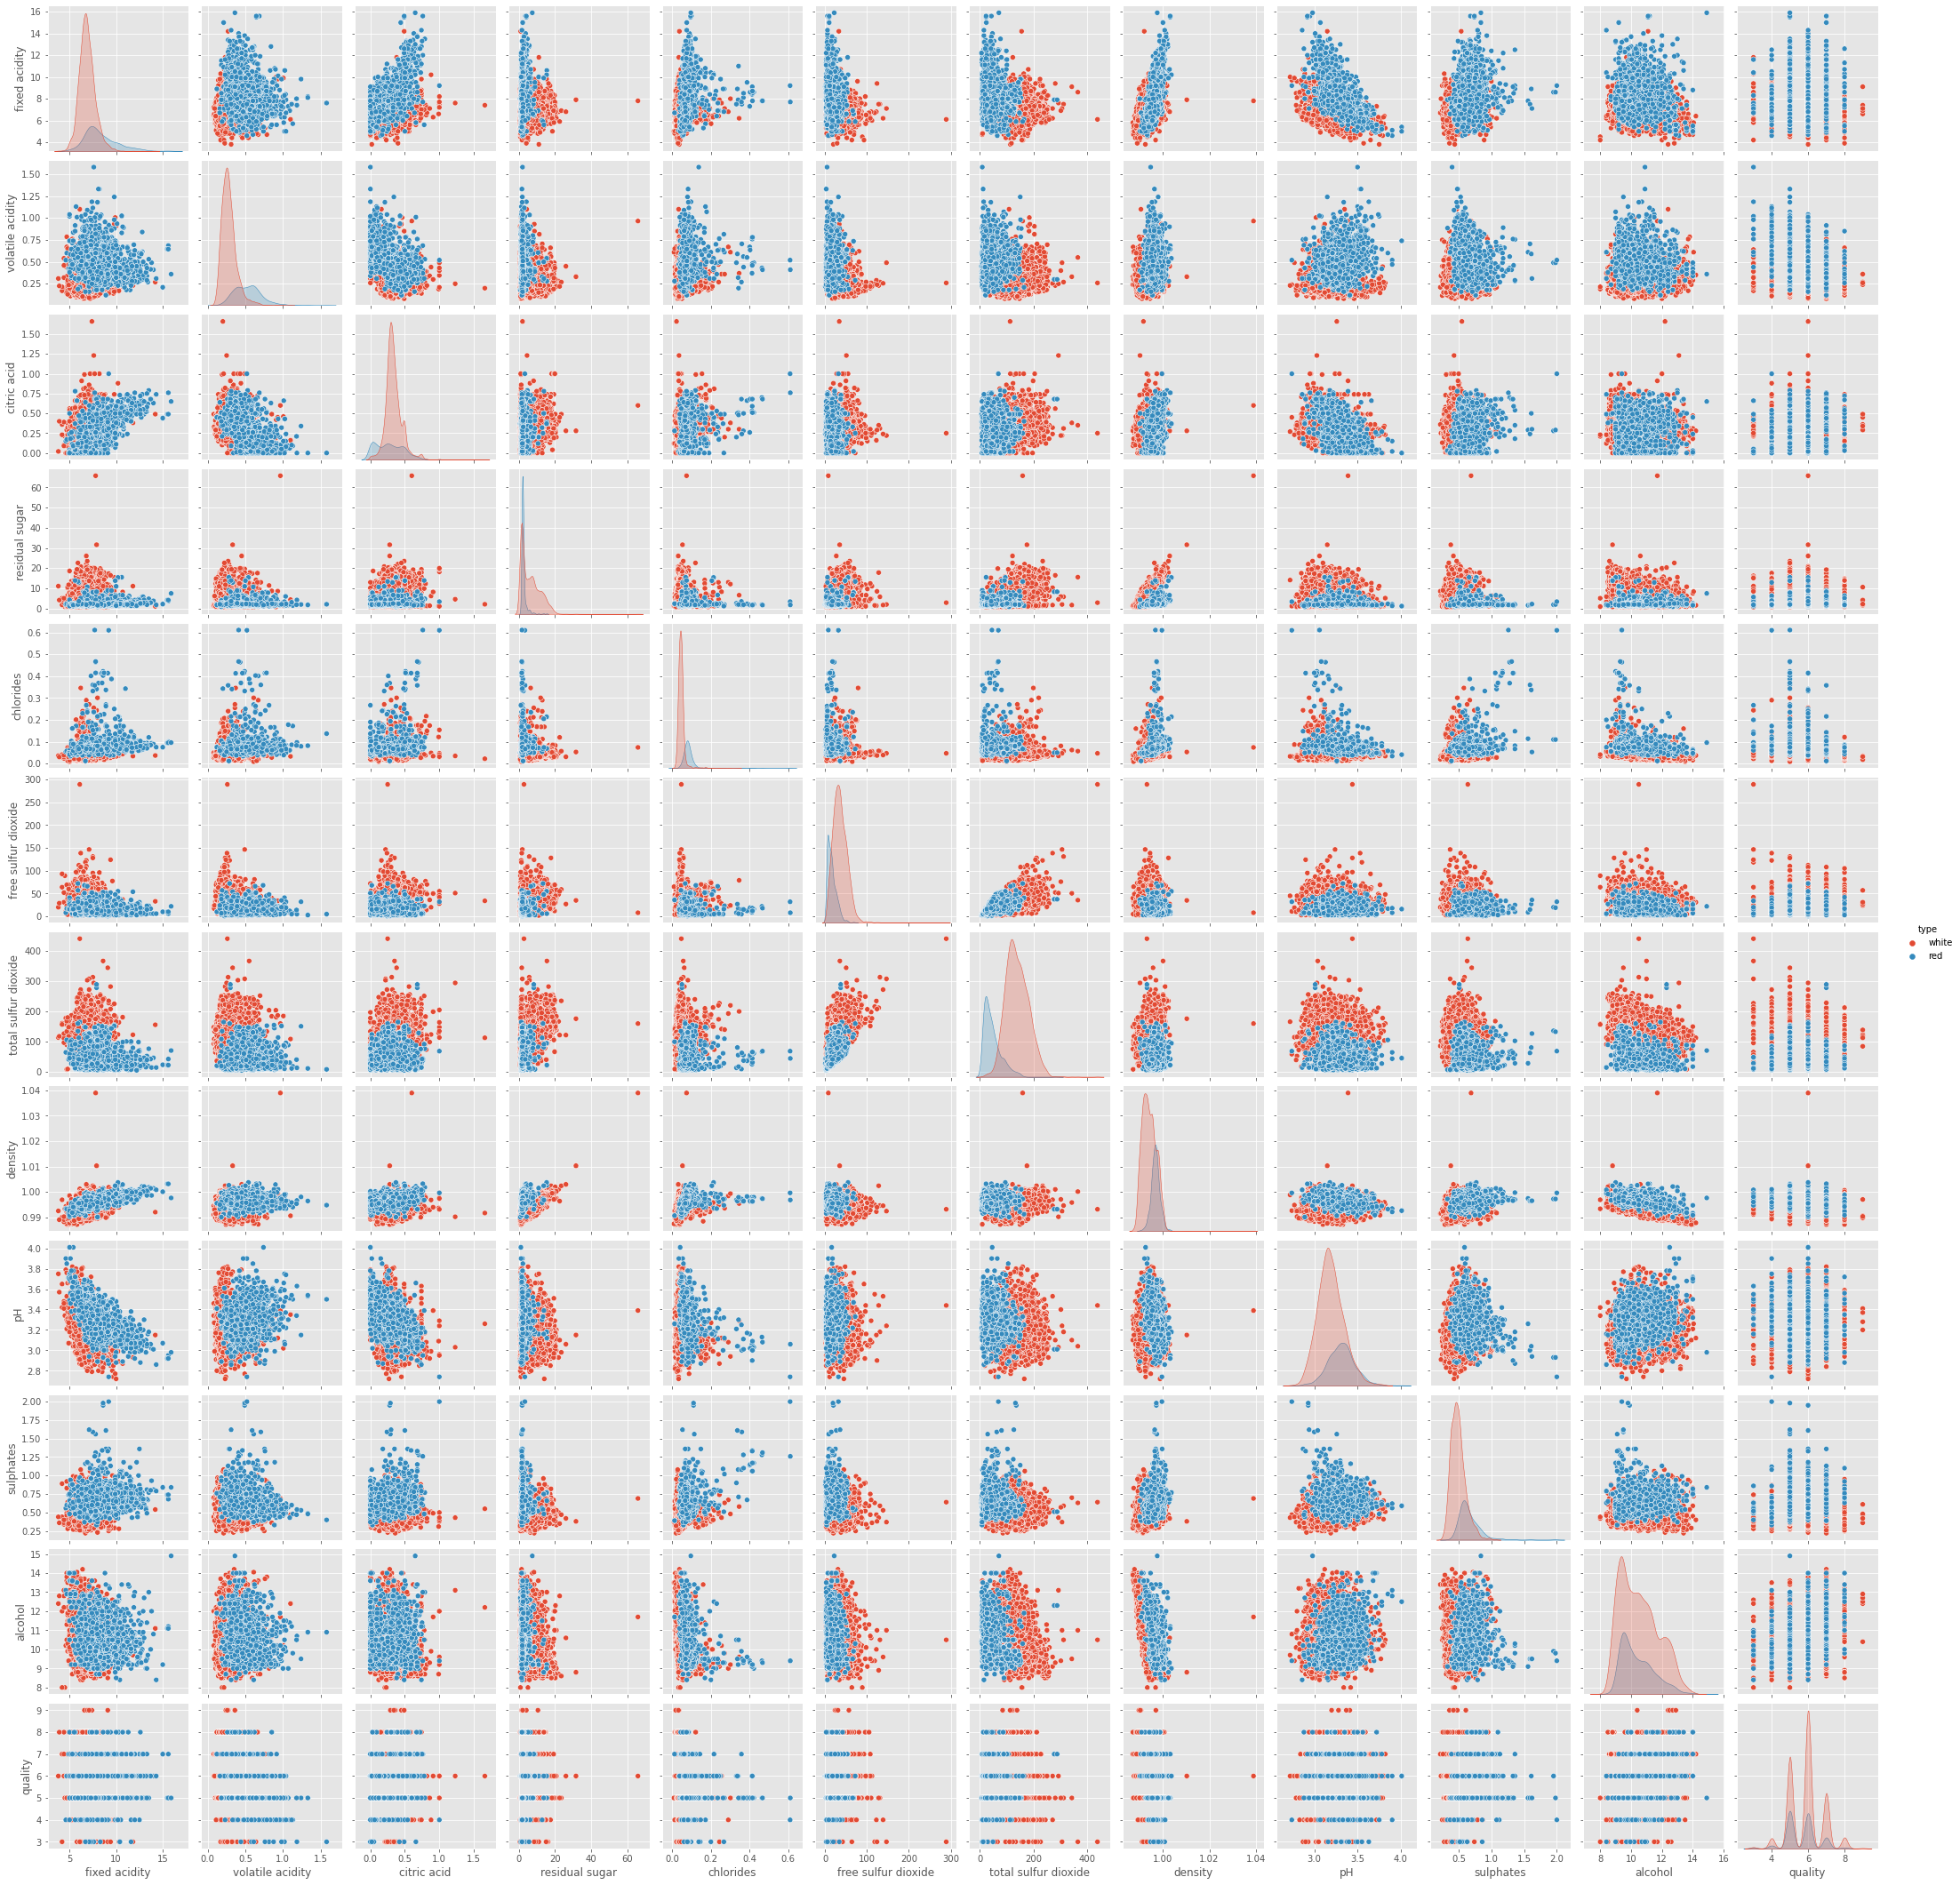

In [47]:
# Scatter plots and kdes.
# Described by type of wine
sns.pairplot(dataset, hue = 'type');

## Two Dimensions

***

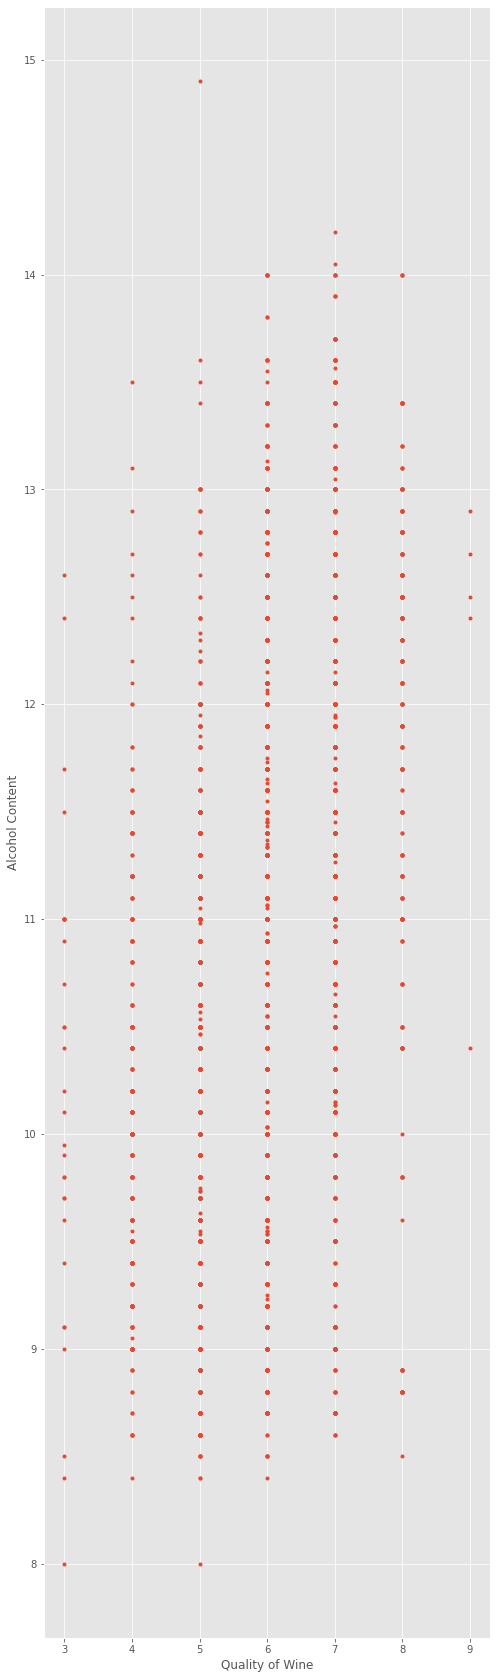

In [119]:
# New figure.
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (8, 30)
# Scatter plot.
ax.plot(dataset['quality'], dataset['alcohol'], '.')

# Set axis labels.
ax.set_xlabel('Quality of Wine');
ax.set_ylabel('Alcohol Content');

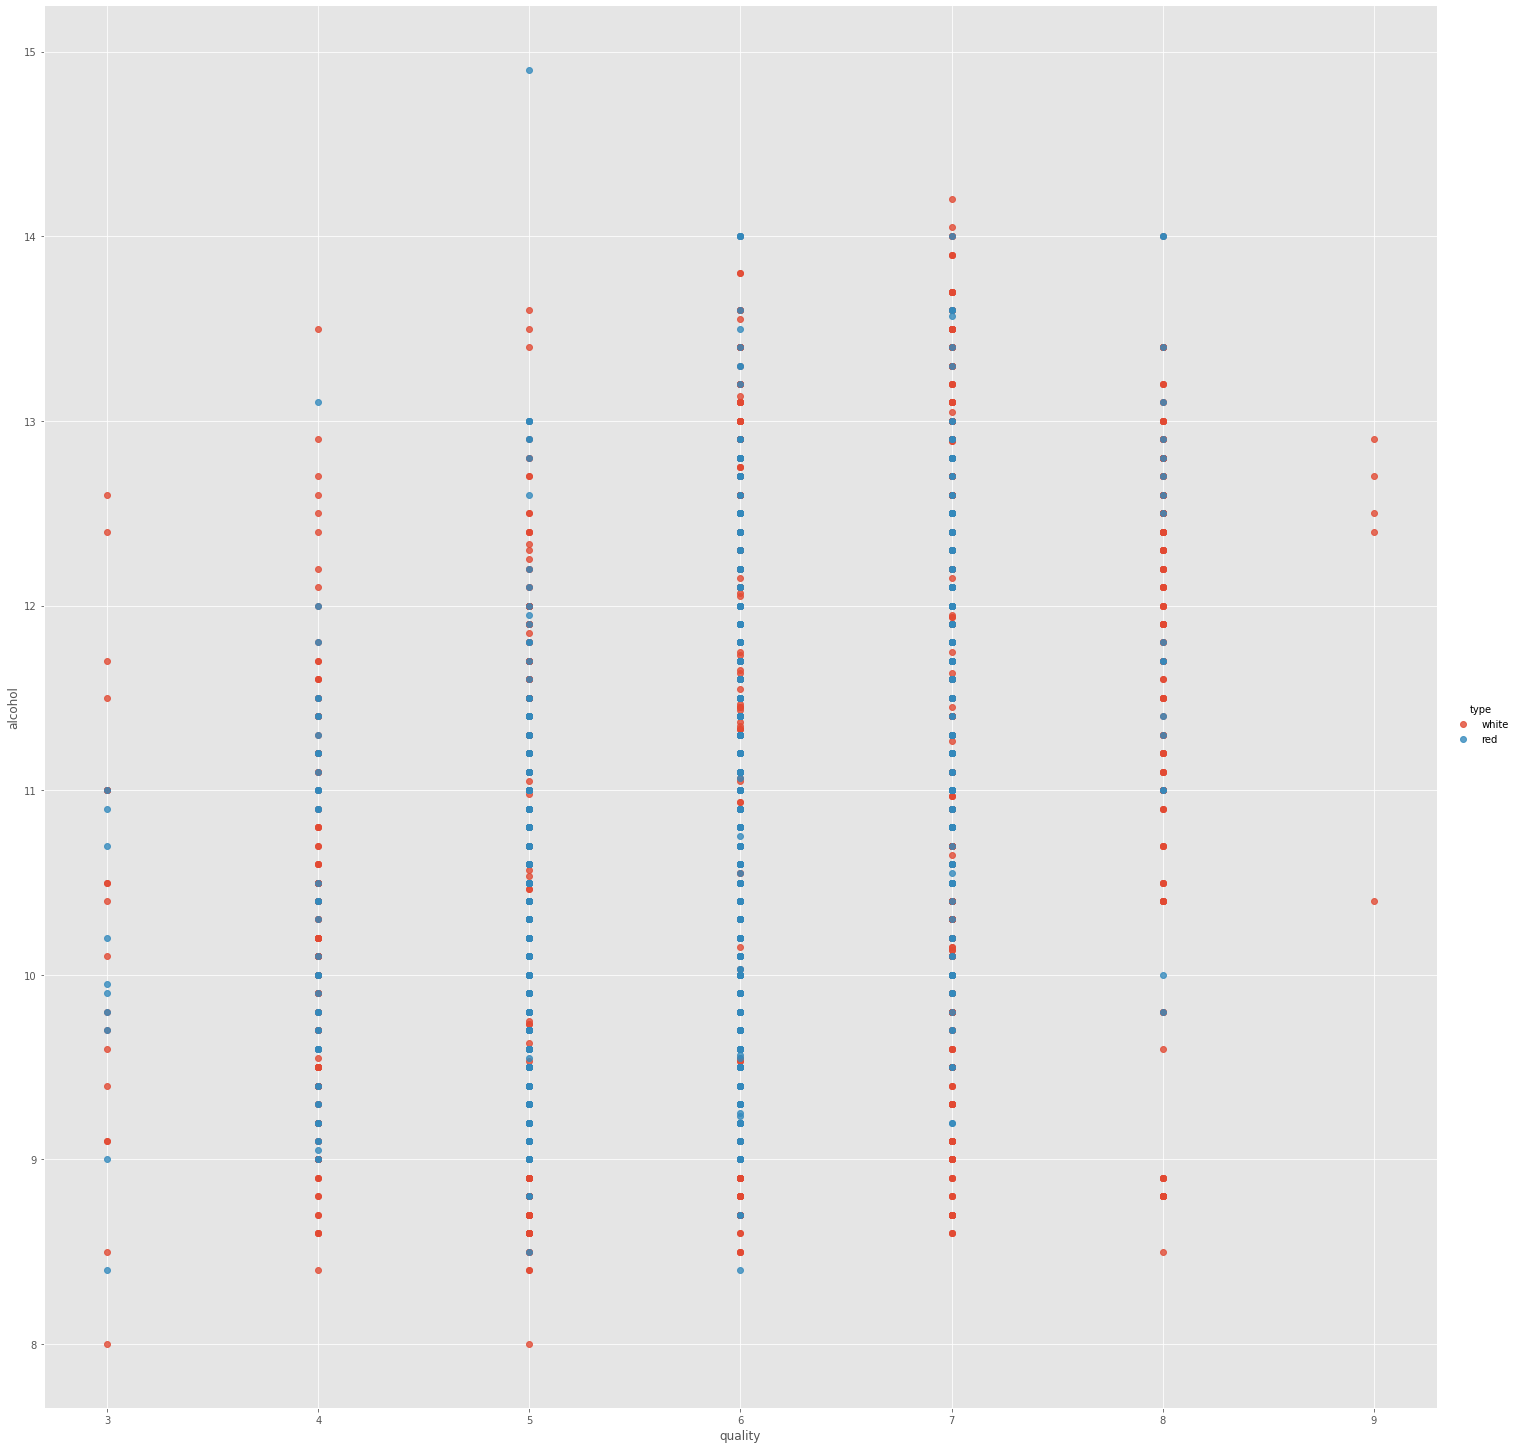

In [124]:
# Seaborn is great for creating complex plots with one command.
sns.color_palette("bright")
sns.lmplot(x="quality", y="alcohol", hue='type', data=dataset, fit_reg=False, height=20, aspect=1);

## Using pyplot

***


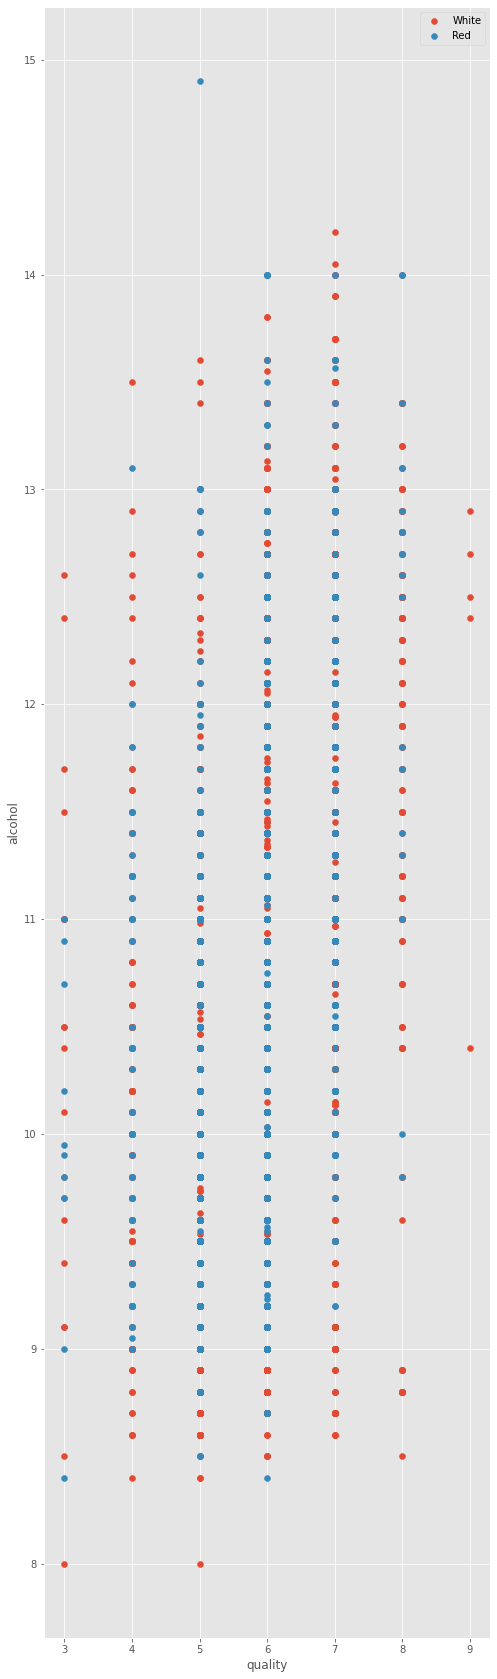

In [126]:
# Segregate the data.
white = dataset[dataset['type'] == 'white']
red = dataset[dataset['type'] == 'red']

# New plot.
fig, ax = plt.subplots()

# Scatter plots.
ax.scatter(white['quality'], white['alcohol'], label='White')
ax.scatter(red['quality'], red['alcohol'], label='Red')

# Show the legend.
ax.set_xlabel('quality')
ax.set_ylabel('alcohol')
ax.legend();

In [68]:
# How the segregation works.
dataset['type'] == 'white'

0        True
1        True
2        True
3        True
4        True
        ...  
6492    False
6493    False
6494    False
6495    False
6496    False
Name: type, Length: 6497, dtype: bool

In [69]:
dataset[dataset['type'] == 'white'].head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

## Using groupby()

***


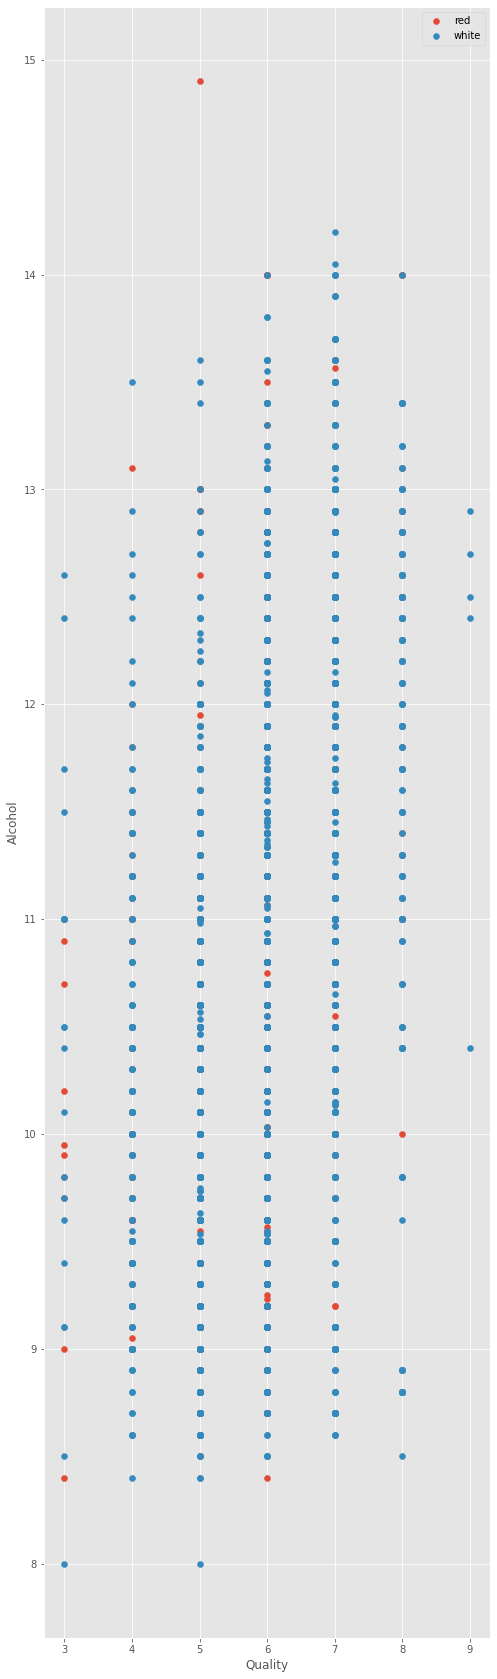

In [127]:
# New plot.
fig, ax = plt.subplots()

# Using pandas groupby().
for type, data in dataset.groupby('type'):
    ax.scatter(data['quality'], data['alcohol'], label=type)

# Show the legend.
ax.set_xlabel('Quality')
ax.set_ylabel('Alcohol')
ax.legend();

In [73]:
# Group by typically takes a categorical variable.
x = dataset.groupby('type')
x

In [74]:
# Pivot tables.
x.mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
type                                                                  
red         8.322104          0.527738     0.271145        2.538806   
white       6.855532          0.278252     0.334250        6.393250   

       chlorides  free sulfur dioxide  total sulfur dioxide   density  \
type                                                                    
red     0.087467            15.874922             46.467792  0.996747   
white   0.045778            35.308085            138.360657  0.994027   

             pH  sulphates    alcohol   quality  
type                                             
red    3.310864   0.658078  10.422983  5.636023  
white  3.188203   0.489835  10.514267  5.877909

In [75]:
# Looping through groupby().
for i, j in x:
    print()
    print(f"i is: '{i}'")
    print(f"j looks like:\n{j[:3]}")
    print()


i is: 'red'
j looks like:
     type  fixed acidity  volatile acidity  citric acid  residual sugar  \
4898  red            7.4              0.70         0.00             1.9   
4899  red            7.8              0.88         0.00             2.6   
4900  red            7.8              0.76         0.04             2.3   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
4898      0.076                 11.0                  34.0   0.9978  3.51   
4899      0.098                 25.0                  67.0   0.9968  3.20   
4900      0.092                 15.0                  54.0   0.9970  3.26   

      sulphates  alcohol  quality  
4898       0.56      9.4        5  
4899       0.68      9.8        5  
4900       0.65      9.8        5  


i is: 'white'
j looks like:
    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30

## Test and Train Split

***

In [76]:
# Split the data frame in two.
train, test = mod.train_test_split(dataset)

In [77]:
# Show some training data.
train.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
670   white            7.8              0.42         0.26             9.2   
626   white            7.6              0.56         0.12            10.4   
2661  white            7.2              0.30         0.26             1.5   
1864  white            7.1              0.25         0.30             2.4   
641   white            6.1              0.28         0.25            12.9   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
670       0.058                 34.0                 199.0  0.99720  3.14   
626       0.096                 22.0                 177.0  0.99830  3.32   
2661      0.041                 46.0                 178.0  0.99154  3.19   
1864      0.042                 25.0                 122.0  0.99400  3.43   
641       0.054                 34.0                 189.0  0.99790  3.25   

      sulphates  alcohol  quality  
670        0.55      9.3        6  
626        0.45      9.1        4  
2661       0.56     11.3        6  
1864       0.61     10.5        6  
641        0.43      9.0        4

In [78]:
# The indices of the train array.
train.index

Int64Index([ 670,  626, 2661, 1864,  641, 1534, 3781, 4507,  489,  741,
            ...
            1866,  526,  442,  573, 3733, 3516, 4161,  681, 5759, 1260],
           dtype='int64', length=4872)

In [79]:
# Show some testing data.
test.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
6343    red            7.4             0.785         0.19            5.20   
23    white            7.6             0.670         0.14            1.50   
5957    red            8.9             0.480         0.53            4.00   
5224    red           11.6             0.530         0.66            3.65   
3940  white            6.9             0.400         0.37            8.90   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
6343      0.094                 19.0                  98.0  0.99713  3.16   
23        0.074                 25.0                 168.0  0.99370  3.05   
5957      0.101                  3.0                  10.0  0.99586  3.21   
5224      0.121                  6.0                  14.0  0.99780  3.05   
3940      0.053                 36.0                 148.0  0.99600  3.16   

      sulphates  alcohol  quality  
6343       0.52      9.6        6  
23         0.51      9.3        5  
5957       0.59     12.1        7  
5224       0.74     11.5        7  
3940       0.50      9.3        5

In [80]:
test.index.size

1625

## Two Dimensions: Test Train Split

***

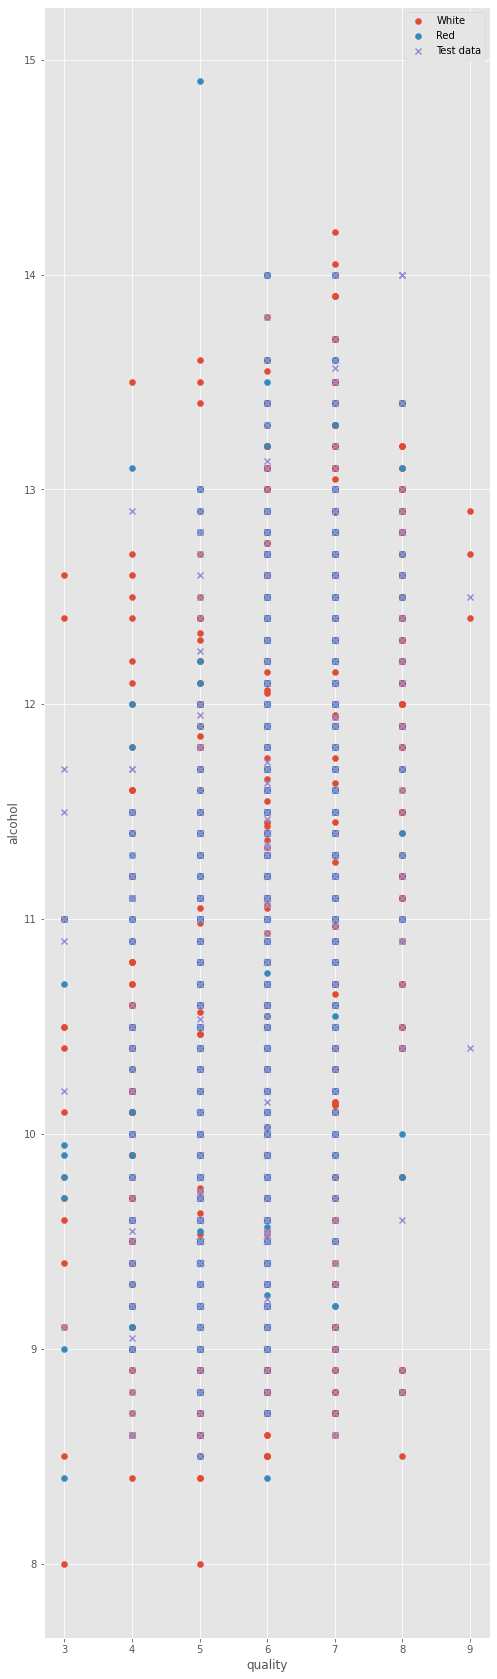

In [128]:
# Segregate the data.
white = train[train['type'] == 'white']
red = train[train['type'] == 'red']

# New plot.
fig, ax = plt.subplots()

# Scatter plots.
ax.scatter(white['quality'], white['alcohol'], marker='o', label='White')
ax.scatter(red['quality'], red['alcohol'], marker='o', label='Red')

# Scatter plot for testing data
ax.scatter(test['quality'], test['alcohol'], marker='x', label='Test data')

# Show the legend.
ax.set_xlabel('quality')
ax.set_ylabel('alcohol')
ax.legend();